## Observations and Insights 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [36]:
# Checking the number of mice.
mice_tot = combined_data["Mouse ID"].unique()
print(f"There are {len(mice_tot)} unique mice in the original data.")

There are 249 unique mice in the original data.


In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Create a concatenate column of MouseID and timepoint
combined_data["concat"] = combined_data["Mouse ID"] + "/" + combined_data["Timepoint"].astype(str)
combined_data

# Return Mouse ID of duplicate mice
duplicated_data = combined_data.loc[combined_data["concat"].duplicated() == True, :]
mouse_duplicates = duplicated_data.iloc[:,0].unique()
print(f"The following Mouse IDs had duplicate data for a specific timepoint: {mouse_duplicates}")

The following Mouse IDs had duplicate data for a specific timepoint: ['g989']


In [38]:
# Optional: Get all the data for the duplicate mouse ID.
# Dataframe of all rows of duplicated data
print("Dataframe of duplicated data:")
duplicated_data

Dataframe of duplicated data:


,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),concat
137,g989,0,45.000000,0,Propriva,Female,21,26,g989/0
360,g989,5,47.570392,0,Propriva,Female,21,26,g989/5
681,g989,10,49.880528,0,Propriva,Female,21,26,g989/10
869,g989,15,53.442020,0,Propriva,Female,21,26,g989/15
1111,g989,20,54.657650,1,Propriva,Female,21,26,g989/20


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Rows to remove
duplicated_rows = duplicated_data.index
clean_data = combined_data.drop(duplicated_rows)


#Preview of clean data
clean_data 


,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),concat
0,b128,0,45.000000,0,Capomulin,Female,9,22,b128/0
1,f932,0,45.000000,0,Ketapril,Male,15,29,f932/0
2,g107,0,45.000000,0,Ketapril,Female,2,29,g107/0
3,a457,0,45.000000,0,Ketapril,Female,11,30,a457/0
4,c819,0,45.000000,0,Ketapril,Male,21,25,c819/0
...,...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25,r944/45
1889,u364,45,31.023923,3,Capomulin,Male,18,17,u364/45
1890,p438,45,61.433892,1,Ceftamin,Female,11,26,p438/45
1891,x773,45,58.634971,4,Placebo,Female,21,30,x773/45


In [40]:
# Checking the number of mice in the clean DataFrame.
mice_tot = clean_data["Mouse ID"].unique()
print(f"There are {len(mice_tot)} unique mice in the cleaned data.")

There are 249 unique mice in the cleaned data.


## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

# Create group object for drug regimens
drug_group = clean_data[["Drug Regimen", "Tumour Volume (mm3)"]].groupby("Drug Regimen")

# Create summary statistics series
tumour_mean = drug_group.mean()
tumour_median = drug_group.median()
tumour_variance = drug_group.var()
tumour_stddev = drug_group.std()
tumour_sem = drug_group.sem()

# Create dataframe
drug_tumour_df = pd.concat([tumour_mean,tumour_median,tumour_variance,tumour_stddev,tumour_sem ], axis=1)
drug_tumour_df = drug_tumour_df.set_axis(["Mean","Median","Variance","Std Dev","SEM"], axis=1)

print("Summary statistics of the tumour volume (mm3) for each Drug Regimen:")
drug_tumour_df

Summary statistics of the tumour volume (mm3) for each Drug Regimen:


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

drug_tumour_agg_df = clean_data[["Drug Regimen", "Tumour Volume (mm3)"]].groupby("Drug Regimen").agg(["mean","median","var","std","sem"])

print("Summary statistics of the tumour volume (mm3) for each Drug Regimen:")
drug_tumour_agg_df

Summary statistics of the tumour volume (mm3) for each Drug Regimen:


Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Total Number of Timepoints')

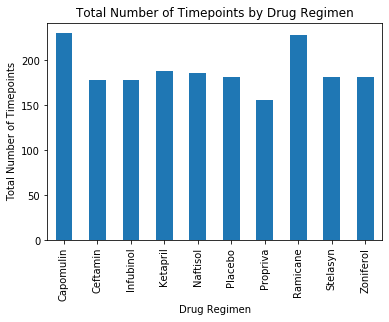

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_df = clean_data[["Drug Regimen","Timepoint"]].groupby("Drug Regimen").count()

ax = timepoints_df.plot(kind="bar", legend= False, title= "Total Number of Timepoints by Drug Regimen")
ax.set_ylabel("Total Number of Timepoints")


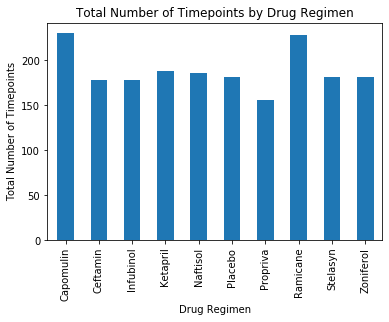

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = timepoints_df.index
y = timepoints_df.iloc[:, 0]

plt.xticks(rotation=90)

plt.title("Total Number of Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.xlim(-.55,9.5)
plt.bar(x, y, width= .5)
plt.show()


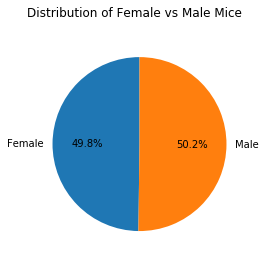

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender_df = mouse_metadata[["Sex","Mouse ID"]].groupby("Sex").count()
mice_gender_df = mice_gender_df.rename(columns={"Mouse ID": ""})

ax = mice_gender_df.plot(kind="pie", subplots=True, autopct="%1.1f%%", legend= False, 
    title= "Distribution of Female vs Male Mice", startangle=90)



## !!! Need to fix the ylabel issue. 
# # ! Need to place percentages.

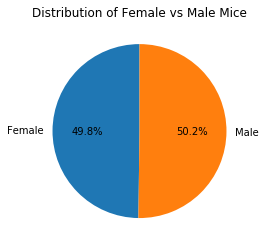

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = mice_gender_df.index
gender = mice_gender_df.iloc[:, 0]

plt.title("Distribution of Female vs Male Mice")

plt.pie(gender, labels=labels,
        autopct="%1.1f%%",
        startangle=90)
plt.show()


## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_grp = clean_data[["Mouse ID","Timepoint"]].groupby("Mouse ID")
max_tp_df = max_timepoint_grp.max()
max_tp_df["concat"] = max_tp_df.index + "/" + max_tp_df["Timepoint"].astype(str)
max_tp_df = max_tp_df.rename(columns={"Timepoint": "Max Timepoint"})

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
clean_max_tp = pd.merge(clean_data, max_tp_df, on="concat", how="inner")


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)
tumour_vol = []
cap = 0
ram = 0
inf = 0
cef = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumour volumes
for regimen in treatments:
    for index, row in clean_max_tp.iterrows():
        if clean_max_tp.loc[index,"Drug Regimen"] == regimen:
            tumour_vol.append(clean_max_tp.loc[index,"Tumour Volume (mm3)"])
    # add subset 
            if regimen == "Capomulin":
                cap += 1
            elif regimen == "Ramicane":
                ram += 1
            elif regimen == "Infubinol":
                inf += 1
            elif regimen == "Ceftamin":
                cef += 1
            else:
                continue

cap_data = pd.Series(tumour_vol[0:cap])        
ram_data = pd.Series(tumour_vol[cap:cap+ram])
inf_data = pd.Series(tumour_vol[cap+ram:cap+ram+inf])
cef_data = pd.Series(tumour_vol[cap+ram+inf:])


In [49]:
    # Determine outliers using upper and lower bounds
## Capomulin
quartiles = cap_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

reg=0
print(f"For the {treatments[reg]} datset:")
print(f"The lower quartile of the data is: {round(lowerq, 2)}")
print(f"The upper quartile of the data is: {round(upperq, 2)}")
print(f"The interquartile range of the data is: {round(iqr, 2)}")
print(f"The the median of the data is: {round(quartiles[0.5], 2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_low = clean_max_tp.loc[(clean_max_tp["Drug Regimen"] == treatments[reg]) &
                             (clean_max_tp["Tumour Volume (mm3)"] < lower_bound), :].iloc[:,0]
outliers_hi = clean_max_tp.loc[(clean_max_tp["Drug Regimen"] == treatments[reg]) &
                             (clean_max_tp["Tumour Volume (mm3)"] > upper_bound), :].iloc[:,0]
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("Possible outliers:")
if (len(outliers_low)) > 0:
        print(outliers_low)
if (len(outliers_hi)) > 0:
        print(outliers_hi)
print("")

## Ramicane
quartiles = ram_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

reg=1
print(f"For the {treatments[reg]} datset:")
print(f"The lower quartile of the data is: {round(lowerq, 2)}")
print(f"The upper quartile of the data is: {round(upperq, 2)}")
print(f"The interquartile range of the data is: {round(iqr, 2)}")
print(f"The the median of the data is: {round(quartiles[0.5], 2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_low = clean_max_tp.loc[(clean_max_tp["Drug Regimen"] == treatments[reg]) &
                             (clean_max_tp["Tumour Volume (mm3)"] < lower_bound), :].iloc[:,0]
outliers_hi = clean_max_tp.loc[(clean_max_tp["Drug Regimen"] == treatments[reg]) &
                             (clean_max_tp["Tumour Volume (mm3)"] > upper_bound), :].iloc[:,0]
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("Possible outliers:")
if (len(outliers_low)) > 0:
        print(outliers_low)
if (len(outliers_hi)) > 0:
        print(outliers_hi)
print("")

## Infubinol
quartiles = inf_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

reg=2
print(f"For the {treatments[reg]} datset:")
print(f"The lower quartile of the data is: {round(lowerq, 2)}")
print(f"The upper quartile of the data is: {round(upperq, 2)}")
print(f"The interquartile range of the data is: {round(iqr, 2)}")
print(f"The the median of the data is: {round(quartiles[0.5], 2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_low = clean_max_tp.loc[(clean_max_tp["Drug Regimen"] == treatments[reg]) &
                             (clean_max_tp["Tumour Volume (mm3)"] < lower_bound), :].iloc[:,0]
outliers_hi = clean_max_tp.loc[(clean_max_tp["Drug Regimen"] == treatments[reg]) &
                             (clean_max_tp["Tumour Volume (mm3)"] > upper_bound), :].iloc[:,0]
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("Possible outliers:")
if (len(outliers_low)) > 0:
        print(outliers_low)
if (len(outliers_hi)) > 0:
        print(outliers_hi)
print("")

## Ceftamin
quartiles = cef_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

reg=3
print(f"For the {treatments[reg]} datset:")
print(f"The lower quartile of the data is: {round(lowerq, 2)}")
print(f"The upper quartile of the data is: {round(upperq, 2)}")
print(f"The interquartile range of the data is: {round(iqr, 2)}")
print(f"The the median of the data is: {round(quartiles[0.5], 2)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_low = clean_max_tp.loc[(clean_max_tp["Drug Regimen"] == treatments[reg]) &
                             (clean_max_tp["Tumour Volume (mm3)"] < lower_bound), :].iloc[:,0]
outliers_hi = clean_max_tp.loc[(clean_max_tp["Drug Regimen"] == treatments[reg]) &
                             (clean_max_tp["Tumour Volume (mm3)"] > upper_bound), :].iloc[:,0]
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("Possible outliers:")
if (len(outliers_low)) > 0:
        print(outliers_low)
if (len(outliers_hi)) > 0:
        print(outliers_hi)
print("")

For the Capomulin datset:
The lower quartile of the data is: 32.38
The upper quartile of the data is: 40.16
The interquartile range of the data is: 7.78
The the median of the data is: 38.13 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Possible outliers:

For the Ramicane datset:
The lower quartile of the data is: 31.56
The upper quartile of the data is: 40.66
The interquartile range of the data is: 9.1
The the median of the data is: 36.56 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Possible outliers:

For the Infubinol datset:
The lower quartile of the data is: 54.05
The upper quartile of the data is: 65.53
The interquartile range of the data is: 11.48
The the median of the data is: 60.17 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Possible outliers:
20    c326
Name: Mouse ID, dtype: object

For the Ceftamin datset:
The lower qua

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd2f077f910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd3009b4090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd2f077ff10>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd2e0b741d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd2f0833dd0>,
 'means': []}

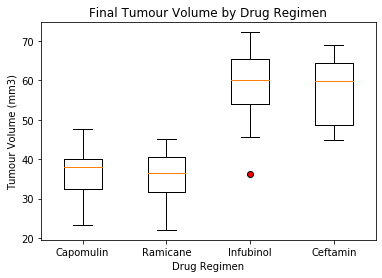

In [61]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
# Create the dataframe of all 4 data series/
boxplot_df = pd.concat([cap_data,ram_data,inf_data,cef_data], axis=1)
boxplot_df = boxplot_df.set_axis(treatments, axis=1).T


fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumour Volume by Drug Regimen')
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumour Volume (mm3)")
ax1.set_xticklabels(treatments)

ax1.boxplot(boxplot_df, flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red'})

## Line and Scatter Plots

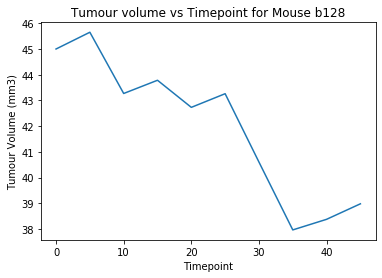

In [51]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
# select mouse (first mouse from dataset taken)
cap_only_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", :]
selected_mouse = cap_only_df.iloc[0,0]
selected_mouse_df = clean_data.loc[clean_data["Mouse ID"] == selected_mouse, :]

# plot tumour volume vs time
x_value = selected_mouse_df["Timepoint"]
y_value = selected_mouse_df["Tumour Volume (mm3)"]

plt.title(f"Tumour volume vs Timepoint for Mouse {selected_mouse}")
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")

plt.plot(x_value, y_value)
plt.show()

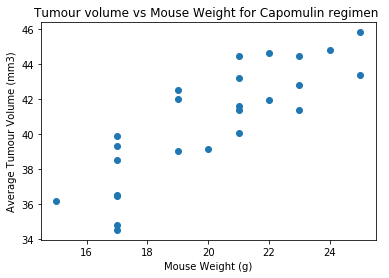

In [52]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
cap_mouse_group = cap_only_df.groupby("Mouse ID")
cap_group_df = cap_mouse_group.mean()

x_value = cap_group_df["Weight (g)"]
y_value = cap_group_df["Tumour Volume (mm3)"]

plt.title(f"Tumour volume vs Mouse Weight for Capomulin regimen ")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")

plt.scatter(x_value, y_value)
plt.show()

## Correlation and Regression

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

# Correlation coefficient

correlation = st.pearsonr(x_value, y_value)
print(f"The correlation co-efficient for Mouse Weight and Tumour Volume for mice on the Capomulin regimen is {round(correlation[0],2)}.")

if correlation[0] > 0:
    correlation_direction = "positive"
else:
    correlation_direction = "negative"

if abs(correlation[0]) < 0.3:
    correlation_type = "no correlation"
elif abs(correlation[0]) < 0.5:
    correlation_type = f"a weak {correlation_direction} correlation"
elif abs(correlation[0]) < 0.7:
    correlation_type = f"a moderate {correlation_direction} correlation"
else:
    correlation_type = f"a strong {correlation_direction} correlation"
print(f"There is {correlation_type} between these factors.")


# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The linear regression model for these two factors is: \n{line_eq}")


The correlation co-efficient for Mouse Weight and Tumour Volume for mice on the Capomulin regimen is 0.84.
There is a strong positive correlation between these factors.
The linear regression model for these two factors is: 
y = 0.95x + 21.55


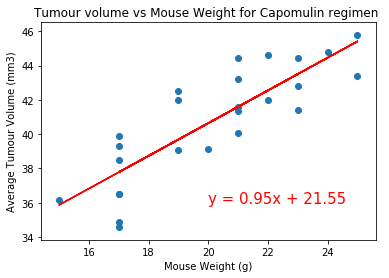

In [54]:
# Print linear regression model with scatter plot

plt.plot(x_value,regress_values, color = "red")

plt.annotate(line_eq,(20, 36),fontsize=15,color="red") 
# Adjust number coordinates to position annotation

plt.title(f"Tumour volume vs Mouse Weight for Capomulin regimen ")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")

plt.scatter(x_value, y_value)
plt.show()